### Численные методы ЛР2 (приближение функций), задачи 6.1-6.3. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 6А: 6.1.2, 6.3.1. В таблице к задаче 6.2 шесть вариантов, значит мой - 6.2.2.

# Задача 6.1 (вариант 2) 

Функция $y=f(x)$ задана таблицей значений $y_0,y_1,\dots,y_n$ в точках $x_0,x_1,\dots,x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+\dots+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m=\sqrt{\frac{1}{n-m}\sum\limits_{k=0}^{n}(P_m(x_k)-y_k)^2}$ стабилизируется или начинает возрастать. 

         ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Задать векторы $x$ и $y$ исходных данных. 
2. Используя функцию **mnk** (см. ПРИЛОЖЕНИЕ 6.В), найти многочлены $P_m$, $m=0,1,2,\ldots,m^*$, по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.
3. Построить гистограмму зависимости $\sigma_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$ многочлена наилучшего среднеквадратичного приближения.
4. На одном чертеже построить графики многочленов $P_m$, $m=0,1,2,\dots,m^*$, и точечный график исходной функции.

## 1. Задать векторы $x$ и $y$ исходных данных.

In [54]:
import numpy as np
import operator
import matplotlib.pyplot as plt

%matplotlib inline

x = np.array([0, 0.375, 0.563, 0.75, 1.125, 1.313, 1.5, 1.690, 1.875, 2.063, 2.25, 2.438, 2.625, 2.813, 3])
y = np.array([4.568, 3.365, 2.810, 2.624, 0.674, 0.557, 0.384, -0.566, -1.44, -1.696, -1.91, -2.819, -3.625, -3.941, -4.367])

## 2. Написать функцию **mnk**.
Найти многочлены $P_m$, $m=0,1,2,\ldots,m^*$, по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.

In [55]:
def mnk1(x, y, m):
    basis = np.array([x**st for st in range(m + 1)])
    b = basis.dot(y)
    g = np.zeros((m+1, m+1))
    v = basis.sum(axis = 1)
    for i in range(m + 1):
        g[i,:] = v
        v = np.roll(v,-1)
        v[-1] = np.sum(x**(i+m+1))
    a = np.linalg.solve(g, b)[::-1]
    p = np.poly1d(a)
    sigma = np.linalg.norm(p(x)-y)/np.sqrt(len(x)-m)
    return p, sigma


result = np.array([mnk1(x,y,m) for m in range(len(x))])
polynoms = np.take(result, [0], axis = 1)
sigmas = np.take(result, [1], axis = 1)

## 3. Построить гистограмму зависимости $\sigma_m$ от $m$.
На ее основании выбрать оптимальную степень $m^*$ многочлена наилучшего среднеквадратичного приближения.

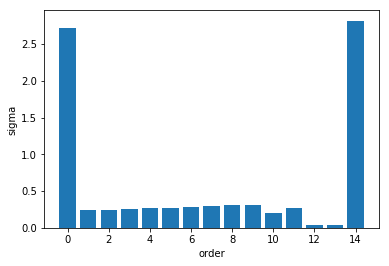

Оптимальная степень многочлена: 13


In [58]:
plt.bar(range(len(x)), sigmas.ravel())
plt.ylabel('sigma')
plt.xlabel('order')
plt.show()

print("Оптимальная степень многочлена:", np.argmin(sigmas))

### Минимальная ошибка при степени многочлена 13

## 4. На одном чертеже построить графики многочленов $P_m$, $m=0,1,2,\dots,m^*$, и точечный график исходной функции.

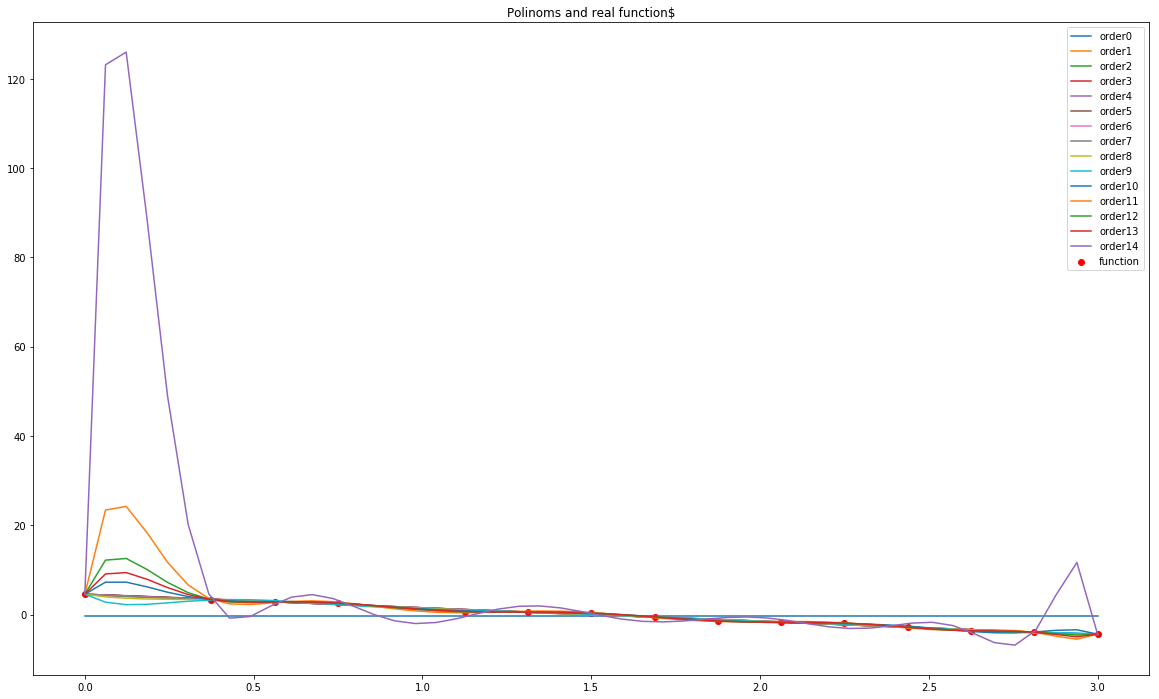

In [59]:
xs = np.linspace(np.min(x), np.max(x))

fig, ax = plt.subplots(figsize=(20,12))

ax.scatter(x, y, c = 'r', label = "function")
for st, p in enumerate(polynoms):
    ax.plot(xs, p[0](xs), label ="order"+str(st))

ax.set_title(r"Polinoms and real function$")
ax.legend();
plt.show()

# Задача 6.2 (вариант 2)

В  таблице приведены  результаты наблюдений за перемещением $x$ материальной точки  по оси  $Ох$  в моменты   времени  $t \in [t_0,T]$.  Известно, что движение  является равномерным и описывается линейной зависимостью $x(t)=vt+b$.  Используя  метод наименьших квадратов,   определить скорость v  и  спрогнозировать положение точки в момент времени  $t=2T$. На одном чертеже  построить график движения точки  и точечный график исходных наблюдений.

In [60]:
t = np.array([1, 1.625, 2.25, 2.88, 3.5, 4.13, 4.75, 5.375, 6])
x = np.array([14.86, 27.15, 41.19, 54, 69.03, 81.6, 96.11, 109.4, 124.02])
t0 = 1
T = 6

In [61]:
v, b = mnk1(t, x, 1)[0]

In [62]:
x_pred = v*2*T + b
print("Положение точки в момент 2T =", x_pred)

Положение точки в момент 2T = 254.622841162


In [63]:
ts = np.linspace(t0, 2*T)

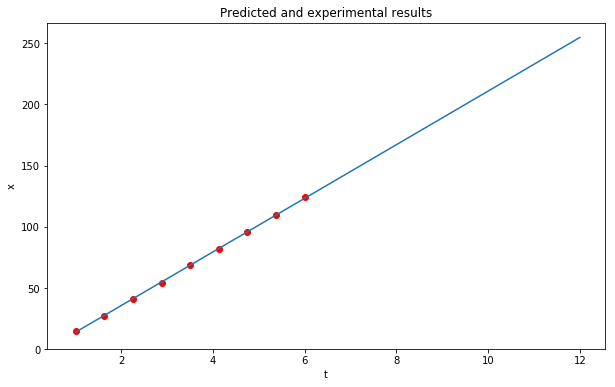

In [64]:
plt.figure(figsize=(10,6))
plt.xlabel('t')
plt.ylabel('x')
plt.plot(ts, v*ts+b)
plt.scatter(t , x, c='r')
plt.title("Predicted and experimental results")
plt.show()

# Задача 6.3 (вариант 1)

Зависимость между величинами $x$ и  $y$ описывается функцией   $y=f(x, a, b)$, где $a$ и  $b$ – неизвестные параметры. Найти  эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. 

УКАЗАНИЕ. Свести исходную задачу к  линейной задаче МНК  можно, сделав подходящую замену переменных. Например, если исходная зависимость имеет вид $y = e^{a+bx^2}$, то  прологарифмировав исходное равенство и введя новые переменные $s = \ln y$ и $t = x^2$, получаем задачу об определении коэффициентов линейной зависимости $s= a+b t$.

$f(x,a,b) = ae^{bx^2}$

$\ln ae^{bx^2} = \ln a + bx^2$

$<s = \ln y; \ \ t = x^2 \ \ c = \ln a> \Rightarrow s = c + b*t$

In [65]:
x = np.array([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
y = np.array([0.876, 0.29523, 0.75958, 1.49184, 2.23671, 2.56000, 
              2.23671, 1.49184, 0.75958, 0.29523, 0.0876])

In [66]:
b, c = mnk1(x**2, np.log(y), 1)[0]
a = np.exp(c)
print('a =', a,'\nb =',b)

a = 2.1101964182 
b = -0.378978013457


def mnk(x, y, m):
    b = np.zeros(m+1)
    g = np.zeros((m+1,m+1))
    for j in range(m+1):
        sum_b = 0
        for i in range(m+1):
            sum_b += y[i]*(x[i]**j)
        b[j] = sum_b
        for k in range(m+1):
            sum_g = 0
            for i in range(m+1):
                sum_g+=x[i]**(k+j) 
        g[j][k]=sum_g
    print("m=",m)
    print(g ,"\n")
    print(b, "\n")
    return np.linalg.solve(g, b)